In [2]:
import xarray as xr
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pathlib import Path

In [ ]:
### VERTICAL AVERAGE
def vert_average(data):
    d = rcs.isel(time = t)
    n = 10; s = 4000
    d30 = np.mean(d[:s].values.reshape(-1, n), axis=1)
    z30 = np.mean(ipralrange[:s].reshape(-1, n), axis=1)
    pres30 = np.mean(pres[:s].reshape(-1, n), axis=1)
    temp30 = np.mean(temp[:s].reshape(-1, n), axis=1)#ta.iloc[t,:].values
    attn_bscmol30 = np.mean(attn_bscmol[:s].reshape(-1, n), axis=1)
    d30_norm = normalisation(zbottom, ztop, z30, d30, attn_bscmol30)
    sr30 = d30_norm/attn_bscmol30
    return 

In [ ]:
maindir = Path('/homedata/nmpnguyen/IPRAL/RF/Calibrated/')
for new in sorted(maindir.glob('*_1440.nc'))

nb = 1
N = np.int_(np.linspace(0, len(new['time'])-1, 15))
f, axs = plt.subplots(figsize=[15,15], nrows=5, ncols=3, sharey=True)
for n, ax in enumerate(axs.flatten()):
    (new.isel(time=N[n], wavelength=0)['calibrated']).plot(y='range', label='calibrated', ax=ax)
    (new.isel(time=N[n], wavelength=0)['simulated']).plot(y='range', label='simulated', ax=ax)
    ax.axhspan(new.attrs['calibration height'][0], new.attrs['calibration height'][1], color='y', alpha=0.5, lw=0, label='calibration height')
    ax.legend(loc='best', frameon=False)
    ax.set_ylim(0,20000)

### Filtrage des signaux incorrects

In [19]:
maindir = Path("/bdd/SIRTA/pub/basesirta/1a/ipral/2018/")
listfiles = sorted(maindir.glob("**/*20180221*_1440.nc"))

In [20]:
file_ipral = xr.open_dataset(listfiles[0])
listfiles[0]

PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/02/21/ipral_1a_Lz1R15mF30sPbck_v01_20180221_000000_1440.nc')

In [21]:
limite1 = np.where((file_ipral['range']>=3000) & (file_ipral['range']<=5000))[0]
limite2 = np.where((file_ipral['range']>=25000) & (file_ipral['range']<=27000))[0]

mean1 = file_ipral['rcs_16'].isel(range=limite1).mean(axis=1)
mean2 = file_ipral['rcs_16'].isel(range=limite2).mean(axis=1)



In [8]:
def filter_profile(profile, limite1, limite2):
    mean1 = profile.isel(range=limite1).mean()
    mean2 = profile.isel(range=limite2).mean()
    if mean1 > mean2: 
        new_profile= profile
        return new_profile
    else: 
        return 0

In [9]:
new1 = filter_profile(file_ipral.isel(time=0), limite1, limite2)
new2 = filter_profile(file_ipral.isel(time=1), limite1, limite2)

# print(new1, new2)
# xr.concat([new1, new2], dim='time')

new = xr.concat([filter_profile(file_ipral.isel(time=t), limite1, limite2) for t in range(0,len(file_ipral['time']))], 
          dim='time')

In [10]:
new

<xarray.Dataset>
Dimensions:                (n_chan: 18, nv: 2, range: 4000, time: 390)
Coordinates:
  * time                   (time) datetime64[ns] 2018-05-16T10:18:48 ... 2018...
  * range                  (range) float32 15.0 30.0 45.0 ... 5.998e+04 6e+04
Dimensions without coordinates: n_chan, nv
Data variables: (12/73)
    time_bnds              (time, nv) datetime64[ns] 2018-05-16T10:18:48 ... ...
    lat                    (time) float32 48.72 48.72 48.72 ... 48.72 48.72
    lon                    (time) float32 2.207 2.207 2.207 ... 2.207 2.207
    altitude               (time) float32 156.0 156.0 156.0 ... 156.0 156.0
    wavelength             (time, n_chan) float32 1.064e+03 607.0 ... 532.0
    telescope              (time, n_chan) int32 1 1 1 1 1 1 1 ... 1 2 2 2 2 2 2
    ...                     ...
    bckgrd_rcs_16          (time) float64 4.706 4.707 4.713 ... 4.773 4.763
    rcs_17                 (time, range) float64 2.64e+04 1.031e+05 ... 1.39e+10
    bckgrd_rcs_17          (time) float64 2.191 2.223 2.268 ... 5.098 4.141
    time_resol             (time) float32 30.0 30.0 30.0 30.0 ... 30.0 30.0 30.0
    range_resol            (time) float32 15.0 15.0 15.0 15.0 ... 15.0 15.0 15.0
    tilt_angle             (time) float32 -90.0 -90.0 -90.0 ... -90.0 -90.0
Attributes: (12/73)
    system:                          CNRS/IPSL IPRAL RAMAN multiwavelength Lidar
    manufacturers:                   Gordien Strato, Raymetrics, Spectra physics
    overlap_is_corrected:            false
    overlap_function:                false
    site_location:                   Palaiseau, France
    instrument_id:                   IPRAL
    ...                              ...
    telescope0_type:                 Enhanced Cassegrain+Nasmith
    telescope0_manufacturer:         Gordien Strato
    telescope0_model:                special
    telescope1_type:                 Newton
    telescope1_manufacturer:         Gordien Strato
    telescope1_model:                special

In [24]:
def filter_profile_file(file, channel, limiteTop, limiteBottom):
    meanTop = file[channel].isel(range=limiteTop).mean(dim='range')
    meanBottom = file[channel].isel(range=limiteBottom).mean(dim='range')
#     print(np.array(meanTop-meanBottom))
    index_mask = np.where(np.array(meanTop-meanBottom)<0)[0]
#     new_file = file[channel].isel(time = index_mask)
    return index_mask

In [25]:
ids = filter_profile_file(file_ipral, 'rcs_16', limite2, limite1)
ids

array([], dtype=int64)

(0.0, 20000.0)

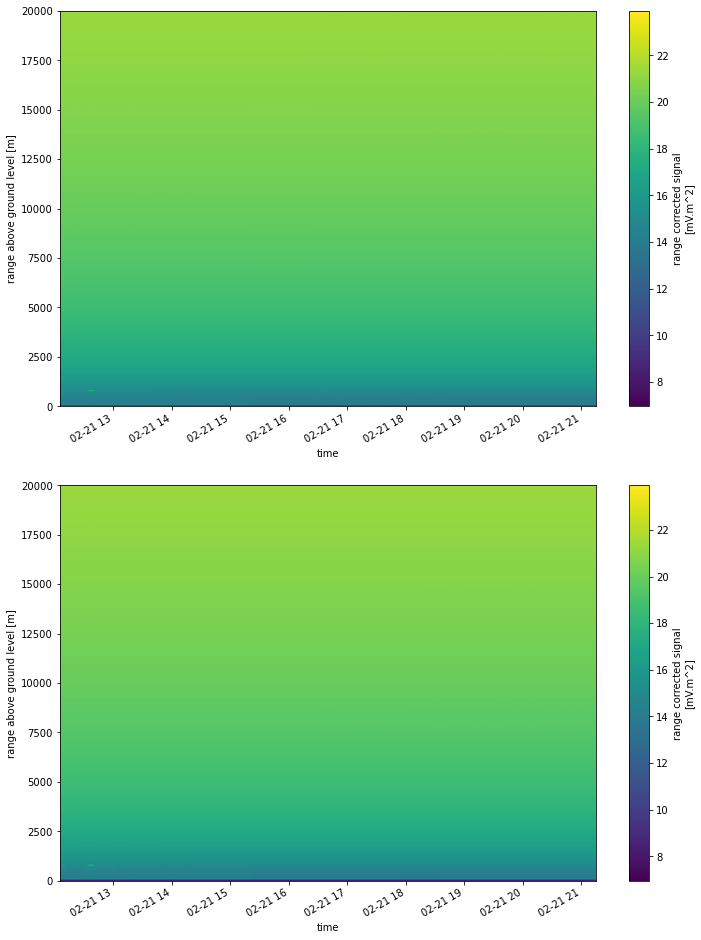

In [23]:
f, (ax, ax2)= plt.subplots(figsize=[12,16], nrows=2)
np.log(file_ipral.isel(time=ids)['rcs_16']).plot(x='time', y='range', ax=ax)
ax.set_ylim(0, 20000)

np.log(file_ipral['rcs_16']).plot(x='time', y='range', ax=ax2)
ax2.set_ylim(0, 20000)



In [152]:
time = file_ipral['time'][ids].to_dataframe().index.to_pydatetime()

(0.0, 20000.0)

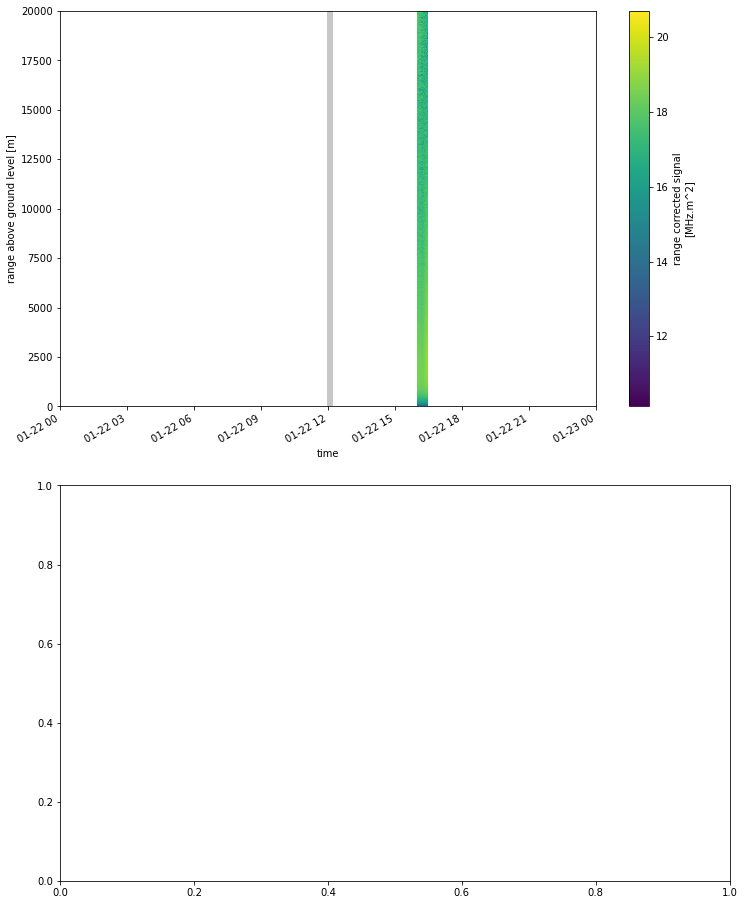

In [174]:
f, (ax, ax2)= plt.subplots(figsize=[12,16], nrows=2)
np.log(file_ipral.isel(time=ids)['rcs_13']).plot(x='time', y='range', ax=ax)


rect = mpl.patches.Rectangle(
    (mdates.date2num(data['time'][~ids][0]), 0),
    mdates.date2num(data['time'][~ids][-1])-mdates.date2num(data['time'][~ids][0]),
    np.nanmax(file_ipral['range']),
    color='#c7c7c7')
ax.add_patch(rect)
ax.set_xlim(pd.to_datetime(file_ipral['time'][100].values).date(),
            pd.to_datetime(file_ipral['time'][100].values).date()+ pd.DateOffset(1))
ax.set_ylim(0, 20000)

array([-481, -483, -484, -485, -486, -487, -488, -489, -490, -491, -492,
       -493, -494, -495, -496, -497, -498, -499, -500, -501, -502, -503,
       -504, -505, -506, -507, -508, -509])